# Relating the span of subjects to the articles authors


Author(s) - Mike Talbot  
Date Created - 17/12/18  
Date Last Modified - 31/01/18  
GitRepo - [LINK](https://github.com/miketalbotbox/MDM_Interdisciplinarity "Super GitHub Repo Yay!")


UTILITY:
This process has three main stages, the first is to pull the list of authors from the articles.  
Then compare the Articles authors to the list of authors in the authors csv.  
Finally see what subjects are studied by each author  

Calculate a spread of subjects using the heat map weighting previously calculated :)  
Plotting this spread against the success of an article  

Attempting to find a correlation between variation and Success. so far no luck and a LOBF isnt working :(  
Done it now buuuut no significant tren :(((((((((  
  
need to  redraw some points as box and whisker plots 

Compare over one author!
Compare the success vs var


In [89]:
"""
Cool fresh imports all the way from the internets to make the magic happen!
"""
import pandas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from SubjectSearch import CreateGraph, FindPerson, TotalSubjects
from SubjectWeights import CreateWeights

"""
Inputs? basically what data input do we want, how much articles are too much 
"""
A = 0
B = 10000

In [90]:
"""
Bringing in the csv files required
"""

ArticleCSV = pandas.read_csv("articles.csv")
AuthorsCSV = pandas.read_csv("authors.csv")



In [91]:
"""
Separating out the main headings required
"""

Article_Authors = ArticleCSV["Author(s) ID"]
Article_Authors = Article_Authors[A:B] #Just shortening the list
Authors_ID_Num = AuthorsCSV["Auth-ID"]
Authors_Subject = AuthorsCSV["Subject Area"]
#Authors_Subject.head()

In [92]:
"""
Handling the Article_Authors List to be a list of lists containing
the authors rather than a list containing a single string with all the 
authors within it

Addendum:
List items are converted into an int, as then comparisons between int
and int will be far quicker and damn we have a lot of data to compare!
"""
#print(len(Article_Authors.index))
List_of_Strings = [0]*(len(Article_Authors.index))
#print(List_of_Strings)

i = 0
for Long_String in Article_Authors:
    List_of_Strings[i] = Long_String.split(';')
    if '' in List_of_Strings[i]:
        List_of_Strings[i].remove('')
    for String in List_of_Strings[i]: ### Loop to make 
        Integer = int(String)
        Const = List_of_Strings[i]
        Const[Const.index(String)] = Integer
    i += 1
    """if i%100 == 0:
        print(i)"""
#print(type(List_of_Strings[0][0]))
List_of_IDs = List_of_Strings ## Nicer Name

In [93]:
"""
Creating the graph to allow using the connections as a search engine
(Used in the Authors_Connectivity_Matrix.ipynb file but made into a
function)
"""

Authors_Subject_List = []
subjects = Authors_Subject.tolist()
subjects = [str(line) for line in subjects]
Authors_Subjects_List = [subject.split('\n') for subject in subjects]
for x in Authors_Subjects_List:
    if '' in x:
        x.remove('') 
        
Total_Subjects = TotalSubjects(Authors_Subjects_List) 
Total_Subjects.remove('nan')
ASGraph = CreateGraph(Authors_ID_Num,Authors_Subjects_List, Total_Subjects)

In [94]:
"""
Going through the list of Authors (List_of_IDs) and comparing them with 
the authors from the authors list!

Output:
A nested list, the first index refers to the articles number and for each
the subjects studied are listed 

Addendum:
Created a file where I can now create an author-subject graph and then 
use that as a search engine of sorts (Using the above box)
"""

Known_Subjects_Article_Final = []

for Authors_per_Article in List_of_IDs:
    List_Of_Known_Authors = []
    List_Of_The_Unknown = []
    Known_Subjects_Article = []
    for Each_ID in Authors_per_Article:
        if Each_ID in Authors_ID_Num.values:
            List_Of_Known_Authors.append(Each_ID)
            #print(Each_ID)
        else:
            List_Of_The_Unknown.append(Each_ID)
            #print('Sorry, this person isnt on file!')
    #print(List_Of_Known_Authors)
    for Known_Person in List_Of_Known_Authors:
        Known_Subjects_Author = FindPerson(ASGraph,Known_Person)
        Known_Subjects_Article = Known_Subjects_Article + [*Known_Subjects_Author]
    if 'nan' in Known_Subjects_Article:
        Known_Subjects_Article.remove('nan')
    Known_Subjects_Article_Final.append(Known_Subjects_Article)          
        #continue
#print(Known_Subjects_Article_Final)   

In [95]:
"""
Initialise connectivities of subjects (Using the heatmap approach from before)
"""

Sub_Vs_Sub = CreateWeights(Authors_Subjects_List, Total_Subjects)

In [96]:
"""
Loop through the articles
In each article loop through each subject
For each subject calculate a "Similarity value"
Find the biggest value
This is designated as the articles discipline


This is slightly redone in order to measure the "strength"
of each subject in each report. The strongest subject is the
main discilpine of the report and then a varience will be calculated
to see how interdisciplinary the writers of the report are
"""
strength = []
Strengths = []
#print(len(Total_Subjects))

for article in Known_Subjects_Article_Final:
    weight = 0
    Weights = np.zeros(len(Total_Subjects))
    for topic in Total_Subjects:
        if topic in article:
            Comp1 = Total_Subjects.index(topic)
            for subject in article:
                try:
                    Comp2 = Total_Subjects.index(subject)
                    weight += Sub_Vs_Sub[Comp1,Comp2]
                    Weights[Total_Subjects.index(topic)] += Sub_Vs_Sub[Comp1,Comp2]
                except:
                    #print('theres a nan but deal with later')
                    continue
            weight /= len(article)
            Weights /= len(article)**(0.5)
    strength.append(weight)
    Strengths.append(Weights)
    
#print(Strengths[0:10])


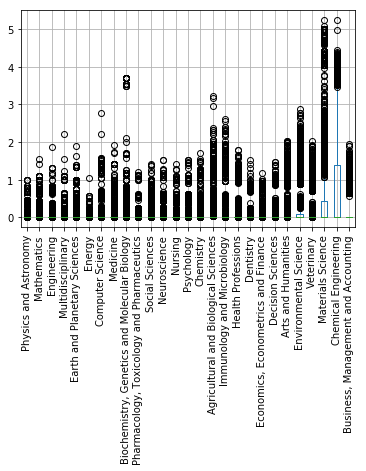

In [97]:
"""
A metric to measure the spread  per author and then compare the spreads of authors in each article
mean/variance

look into aspects in both authors and articles.
"""
#print(Strengths)
"""
for n in range(len(Strengths)):
    plt.scatter(Total_Subjects,Strengths[n])
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.ylabel("Strength")
plt.xlabel("Subjects")
plt.title("Strength of subject in each article")
plt.show()
#plt.plot(strength)
#plt.show()
"""
"""
Plotting the strengths of subjects

###### look into box and whisker plots????

"""

StrengthsDF = pandas.DataFrame(Strengths,columns=Total_Subjects)
boxplot = StrengthsDF.boxplot(rot=90)


In [34]:
"""
Searching for the dominant subject in an article and storing in a list
"""
Num_Art = len(Strengths)
Top_Subject = []
Top_Subject_Index = []
Strengths = np.array(Strengths)
for n in range(Num_Art):
    MaxIndex = np.unravel_index(np.argmax(Strengths[n]),Strengths.shape)
    #print(Total_Subjects[MaxIndex[1]])
    Top_Subject_Index.append(MaxIndex[1])
    Top_Subject.append(Total_Subjects[MaxIndex[1]])

#print(Top_Subject[0:30])
    

In [62]:
"""
Calculating the varience of the data
"""

Difference_List_Total = []
Variation = []
for article in Known_Subjects_Article_Final:
    Topic = Top_Subject_Index[Known_Subjects_Article_Final.index(article)]
    Difference_List = []
    for subject in article:
        try:
            Comp = Total_Subjects.index(subject)
            Difference_List.append(Sub_Vs_Sub[Topic,Comp])
        except:
            print("Still nan's.", end=' ')
    if Difference_List != []:
        Var = np.var(Difference_List)
    else:
        Var = 0 # avoids getting NaN from having an empty set
    Difference_List_Total.append(Difference_List)
    Variation.append(Var)

#print(Variation)

Still nan's. Still nan's. Still nan's. 

['Physics and Astronomy', 'Mathematics', 'Engineering', 'Multidisciplinary', 'Earth and Planetary Sciences', 'Energy', 'Computer Science', 'Medicine', 'Biochemistry, Genetics and Molecular Biology', 'Pharmacology, Toxicology and Pharmaceutics', 'Social Sciences', 'Neuroscience', 'Nursing', 'Psychology', 'Chemistry', 'Agricultural and Biological Sciences', 'Immunology and Microbiology', 'Health Professions', 'Dentistry', 'Economics, Econometrics and Finance', 'Decision Sciences', 'Arts and Humanities', 'Environmental Science', 'Veterinary', 'Materials Science', 'Chemical Engineering', 'Business, Management and Accounting']


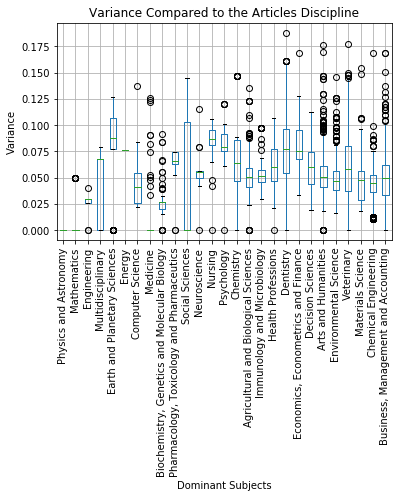

In [152]:
"""
Plotting the variance to see if there is a pattern, no there isnt
"""
"""
plt.scatter(Top_Subject,Variation)
locs, labels = plt.xticks()
plt.xticks(rotation=90)
plt.title("Variation of report when Subject is main discipline")
plt.ylabel("Variation")
plt.show()
"""
"""
Variation
Create a list of variances using the dominant subjects
"""
VarNList = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
i = 0
for index in Top_Subject_Index:
    VarNList[index].append(Variation[i])
    i += 1
#print(Top_Subject)
#print(VarNList[-1])
#del VarNList[0]              
VarDF = pandas.DataFrame(VarNList).transpose()
print(Total_Subjects)
VarDF.columns = Total_Subjects
VarDF.head()

boxplot = VarDF.boxplot(rot = 450)
plt.ylabel("Variance")
plt.xlabel("Dominant Subjects")
plt.title("Variance Compared to the Articles Discipline")
plt.show()

[1.885558   0.         2.44325698 ... 2.49252527 1.42981269 1.19591601]


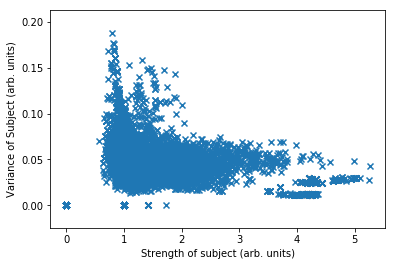

In [37]:
"""
Plotting the strength versus the variance (really im unsure how to
show this data so if i find a pretty way i'll keep it)

The graph below shows how the stronger the emphasis on a subject
the less variation there is on 
"""
#print(Top_Subject_Index)
#print(Strengths)
print(np.max(Strengths,axis=1))
#print(Variation)

plt.scatter(np.max(Strengths,axis=1), Variation,marker='x')
plt.xlabel('Strength of subject (arb. units)')
plt.ylabel('Variance of Subject (arb. units)')
plt.show()

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([   1,   22,   27, ..., 9985, 9986, 9993], dtype=int64))
[[1.885558   0.         2.44325698 ... 2.49252527 1.42981269 1.19591601]]
1
[0.02603408 0.03091386]


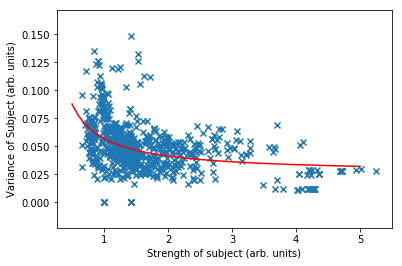

In [38]:
"""
See what a line of best fit would look like in this, using a 1/x basis
"""
#A number to jump data points to thin out the graph from being one big blue blob
jump = 10

"""
First need to remove the heavy zero strength data points
"""
b = np.array([np.max(Strengths,axis=1)])
RemoveList = np.where(b==0)
print(RemoveList)
bb = np.delete(b,RemoveList)

print(b)
print(len(b))

#print(np.max(Strengths,axis=1))
a = np.ones([1,len(bb)])

b = np.divide(1,bb)
b = np.array([b])

Xbart = np.concatenate([a,b])
#print(At)
Xbar = Xbart.T
#print(A)

y = np.array(Variation)
y  = np.delete(y,RemoveList)
y = y.T

Beta = np.matmul(np.linalg.inv(np.matmul(Xbart,Xbar)),np.matmul(Xbart,y))
print(Beta)
X = np.linspace(0.5,5,50)
Y = Beta[0] + np.divide(Beta[1],X)

plt.scatter(bb[::jump], y[::jump],marker='x')
plt.plot(X,Y,'r')
plt.xlabel('Strength of subject (arb. units)')
plt.ylabel('Variance of Subject (arb. units)')
plt.show()

In [39]:
"""
Plotting the average Strength of a subject, use this to normalise the 
results, as some subjects may not be as strong in reports but will 
still be the lead focus of the report.
"""
Size_Of_Strengths = len(Total_Subjects)
Average_Strengths = np.zeros([1,Size_Of_Strengths])
for n in range(len(Strengths)):
    #print(n)
    Average_Strengths += Strengths[n][0:Size_Of_Strengths]
Average_Strengths /= len(Strengths)
Average_Strengths = Average_Strengths.flatten()
#print(Average_Strengths)

In [40]:
"""
With the 'normalisation' re-establised apply this to the strengths 
This creates a disgusting graph and ewwwwwwww
#
LOOK INTO:
changing how variation works, if its 1/strength then we need to 
change someting with variation
"""

Norm_Max_Strengths = []
Strength_Index = np.argmax(Strengths,axis=1)
for n in range(len(Strengths)):
    Norm_Max_Strengths.append(max(Strengths[n][0:Size_Of_Strengths])/Average_Strengths[Strength_Index[n]])

#plt.scatter(Norm_Max_Strengths, Variation)
#plt.show()

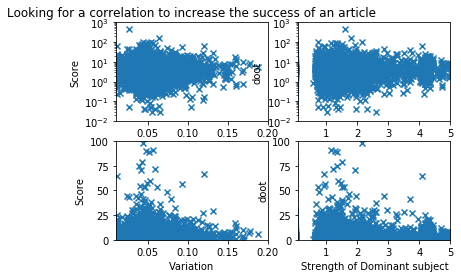

In [43]:
"""
Finally relating the success and the strengths of the subject
fingers crossed for correllation 
graphs are edited to hide the Zeros on x as they show no data
may form a histogram as the data isnt a simple curve but more
of a distribution, which may guve us the optimal interdisciplinary
spread.

Four graphs, lhs is variance, rhs is strengths
             top is log on y, bot is standard y
"""

Article_Success = pandas.read_csv("Article_Success.csv")
SuccessScores = Article_Success["Success"]
SuccessScores = SuccessScores[A:B]
for i in range(len(SuccessScores)):
    try:
        score = float(SuccessScores[i])
        #print(score)
    except:
        #print("nope")
        score = 0
    SuccessScores[i] = score

#print(SuccessScores[0:15])

#print(len(Variation),len(SuccessScores))

        
#print(len(Variation),len(Strengths),len(SuccessScores))
plt.figure()


plt.subplot(2,2,1)
plt.title("Looking for a correlation to increase the success of an article")
axes = plt.gca()
axes.set_xlim([0.01,0.2])
axes.set_yscale('log')
axes.set_ylim([0.01,1000])



plt.scatter(Variation,SuccessScores,marker='x')
plt.xlabel("Variation")
plt.ylabel("Score")


plt.subplot(2,2,2)
axes = plt.gca()
axes.set_xlim([0.1,5])
axes.set_yscale('log')
axes.set_ylim([0.01,1000])


plt.scatter(np.max(Strengths,axis=1),SuccessScores,marker='x')
plt.xlabel("Strength of Dominant subject")
plt.ylabel("doot")

plt.subplot(2,2,3)
axes = plt.gca()
axes.set_xlim([0.01,0.2])
axes.set_ylim([0.01,100])



plt.scatter(Variation,SuccessScores,marker='x')
plt.xlabel("Variation")
plt.ylabel("Score")


plt.subplot(2,2,4)
axes = plt.gca()
axes.set_xlim([0.1,5])
axes.set_ylim([0.01,100])


plt.scatter(np.max(Strengths,axis=1),SuccessScores,marker='x')
plt.xlabel("Strength of Dominant subject")
plt.ylabel("doot")


plt.show()
#corellation coeff between x/y
#create bins on X to avaeger out and see if it is 
#just the shear number of articles creating outliers

# My God this next bit is horrifying
# just accept its existance and move along
# please move forward to where things are once more safe

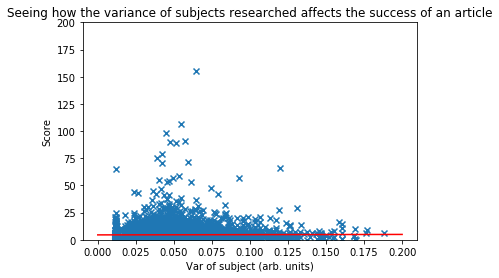

In [42]:
"""
see what the "trend" looks like?
"""
b = np.array(Variation)
RemoveList = np.where(b==0)
#print(RemoveList)
bb = np.delete(b,RemoveList)


#print(np.max(Strengths,axis=1))
a = np.ones([1,len(bb)])

b = np.array([bb])

Xbart = np.concatenate([a,b])
#print(At)
Xbar = Xbart.T
#print(A)
Scores = []
for a_score in SuccessScores:
    a_score = float(a_score)
    if np.isnan(a_score):
        a_score = 0
    Scores.append(a_score)
y = np.array([Scores])
y = np.delete(y,RemoveList)
y = y.reshape((len(y),1))
#print(Xbart)
#print(y)
#print((np.matmul(Xbart,y)))
Beta = np.matmul(np.linalg.inv(np.matmul(Xbart,Xbar)),np.matmul(Xbart,y))
#print(Beta)
X = np.linspace(0,0.2,2)
Y = Beta[0] + Beta[1]*X

plt.scatter(bb, y,marker='x')
plt.plot(X,Y,'r')
axes = plt.gca()
#axes.set_yscale('log')
axes.set_ylim([0,200])
plt.xlabel('Var of subject (arb. units)')
plt.ylabel('Score')

plt.title("Seeing how the variance of subjects researched affects the success of an article")
plt.show()

In [41]:
"""
independant for loop to test the significance of the trend by rearranging the
y data points to new x's and calculating the Betas for each of those

iN this there are a lot of crap named vairables as they will never be used 
4.again
"""



XTX1 = np.linalg.inv(np.matmul(Xbart,Xbar))
XT = Xbart
                     
Bzeros = []
Bones = []
for i in range(10000):
    perm = np.random.permutation(len(y))
    Ynew = y[perm]
    #print(Ynew)
    BetaNew = np.matmul(XTX1,np.matmul(XT,Ynew))
    #print(BetaNew)
    Bzeros.append(BetaNew[0])
    Bones.append(BetaNew[1])
    
STD0 = np.std(Bzeros)
STD1 = np.std(Bones)
mean0 = np.mean(Bzeros)
mean1 = np.mean(Bones)

print(mean0,mean1)

print(STD0,STD1)

STDs0 = (Beta[0] - mean0)/STD0
STDs1 = (Beta[1] - mean1)/STD1

print(STDs0,STDs1)

0.04874204058348851 6.426002291956251e-06
0.0006560939503551312 0.0008929989377911225
-34.61083230550174 34.61083230550177


In [45]:
Beta

array([[4.51787742],
       [2.11453103]])

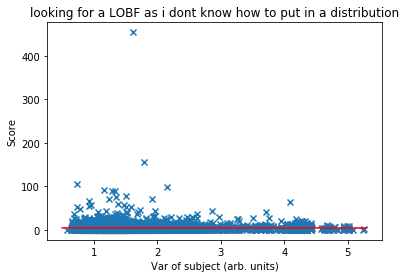

[[ 4.72997189]
 [-0.06752911]]


In [46]:
"""
see what the "trend" looks like?
"""
b = np.array(np.max(Strengths,axis=1))
RemoveList = np.where(b==0)
#print(RemoveList)
bb = np.delete(b,RemoveList)


#print(np.max(Strengths,axis=1))
a = np.ones([1,len(bb)])

b = np.array([bb])

Xbart = np.concatenate([a,b])
#print(At)
Xbar = Xbart.T
#print(A)
Scores = []
for a_score in SuccessScores:
    a_score = float(a_score)
    if np.isnan(a_score):
        a_score = 0
    Scores.append(a_score)
y = np.array([Scores])
y = np.delete(y,RemoveList)
y = y.reshape((len(y),1))
#print(Xbart)
#print(y)
#print((np.matmul(Xbart,y)))
Beta = np.matmul(np.linalg.inv(np.matmul(Xbart,Xbar)),np.matmul(Xbart,y))
#print(Beta)
X = np.linspace(0.5,5.3,2)
Y = Beta[0] + Beta[1]*X

plt.scatter(bb, y,marker='x')
plt.plot(X,Y,'r')
#axes = plt.gca()
#axes.set_yscale('log')
#axes.set_ylim([0.01,1000])
plt.xlabel('Var of subject (arb. units)')
plt.ylabel('Score')

plt.title("looking for a LOBF as i dont know how to put in a distribution")
plt.show()

print(Beta)

In [44]:

XTX1 = np.linalg.inv(np.matmul(Xbart,Xbar))
XT = Xbart
                     
Bzeros = []
Bones = []
for i in range(10000):
    perm = np.random.permutation(len(y))
    Ynew = y[perm]
    #print(Ynew)
    BetaNew = np.matmul(XTX1,np.matmul(XT,Ynew))
    #print(BetaNew)
    Bzeros.append(BetaNew[0])
    Bones.append(BetaNew[1])
    
STD0 = np.std(Bzeros)
STD1 = np.std(Bones)
mean0 = np.mean(Bzeros)
mean1 = np.mean(Bones)

print(mean0,mean1)

print(STD0,STD1)

STDs0 = (Beta[0] - mean0)/STD0
STDs1 = (Beta[1] - mean1)/STD1

print(STDs0,STDs1)

4.625419076656876 -0.029748898699414748
0.2026653630814678 4.040957540308282
[-0.53063659] [0.53063659]


# It is safe here
# You can hide from that beast that is above

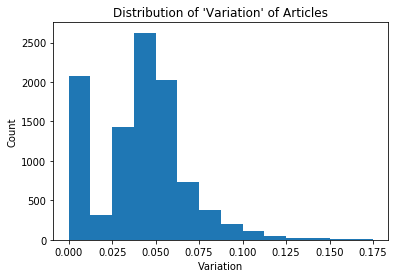

In [48]:
"""
Making a historgram for the Variation
"""

plt.hist(Variation,14,[0,0.175])
plt.xlabel("Variation")
plt.ylabel("Count")
plt.title("Distribution of 'Variation' of Articles")
plt.savefig("Hist_of_Var2.png")
plt.show()

In [49]:
"""
Finding out if there are any trends 
if you were to separate out the data subject by subject
"""
Str = np.max(Strengths,axis=1)
SubjectIndex = np.argmax(Strengths,axis=1)

ChosenSubject = 0 # Choose value from 0 to 21?

sortedStrengths = Str[np.where(SubjectIndex == ChosenSubject)]
#print(SuccessScores)
print(SubjectIndex)
print(np.where(SubjectIndex == ChosenSubject))
sortedScores = SuccessScores[np.where(SubjectIndex == ChosenSubject)]

plt.plot(sortedStrengths,sortedScores)


[25  0 25 ... 25 25 21]
(array([   1,   22,   27, ..., 9985, 9986, 9993], dtype=int64),)


ValueError: Can only tuple-index with a MultiIndex

In [ ]:
"""
Generating a histogram to make the data possibly clearer - no bad idea,
thats just me looking at the distribution in strengths and variation,
it will show no data for the success score
"""

"""
Linear regression for the data with a 1/x thing encoded, as that is 
what it looks like - DoneZo!


DO the  box and whisker plot for each subject! Better than that ugly blue plot
- Bleeeeehhhhhhhh - did it for tthe variances instead but hey its a nice-iish graph i suppose
 

 
put the variation into bins to signify how crowded that area is  DoNeYaY
 
run random y values switch x ad ys 
fit that and get a value
get a dist
the average slope should be zero
get a standard deviation
if value is within 2 s.d. then it is insignificant
^^^^ DONE

###### Still todo!
look at average successes per subject 
"""

